In [1]:
import torch

In [2]:
[111] + [222] * (-1)

[111]

In [4]:
byte_array = bytearray("mp3", 'utf-8')
print(byte_array)
bytes = []
for byte in byte_array:
    bytes.append(byte)
    print(type(byte))
print(bytes)


input_patches = torch.tensor([bytes], device="cpu")
feed_to_generate = input_patches.unsqueeze(0)
inside = feed_to_generate.reshape(1, 1, -1)
print(inside)




bytearray(b'mp3')
<class 'int'>
<class 'int'>
<class 'int'>
[109, 112, 51]
tensor([[[109, 112,  51]]])


In [7]:
from utils import *
byte_frequency_table = ByteFrequencyDistribution().get_byte_frequency_table_by_file_path("train-gen.py")
print(byte_frequency_table)

{'00': 0.0, '01': 0.0, '02': 0.0, '03': 0.0, '04': 0.0, '05': 0.0, '06': 0.0, '07': 0.0, '08': 0.0, '09': 0.0, '0A': 2.342, '0B': 0.0, '0C': 0.0, '0D': 2.342, '0E': 0.0, '0F': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '1A': 0.0, '1B': 0.0, '1C': 0.0, '1D': 0.0, '1E': 0.0, '1F': 0.0, '20': 23.386, '21': 0.006, '22': 0.533, '23': 1.587, '24': 0.0, '25': 0.022, '26': 0.028, '27': 0.494, '28': 1.321, '29': 1.321, '2A': 0.161, '2B': 0.289, '2C': 0.66, '2D': 0.144, '2E': 1.104, '2F': 0.139, '30': 0.161, '31': 0.228, '32': 0.078, '33': 0.011, '34': 0.039, '35': 0.039, '36': 0.05, '37': 0.0, '38': 0.006, '39': 0.0, '3A': 0.638, '3B': 0.0, '3C': 0.006, '3D': 1.11, '3E': 0.078, '3F': 0.033, '40': 0.0, '41': 0.488, '42': 0.089, '43': 0.444, '44': 0.316, '45': 0.677, '46': 0.033, '47': 0.205, '48': 0.438, '49': 0.416, '4A': 0.0, '4B': 0.044, '4C': 0.327, '4D': 0.183, '4E': 0.433, '4F': 0.316, '50': 0.461, '51': 0.011, '52': 0

In [1]:
byte_frequency_table = {"a": 2, "b": 3, "c": 5}

In [4]:
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


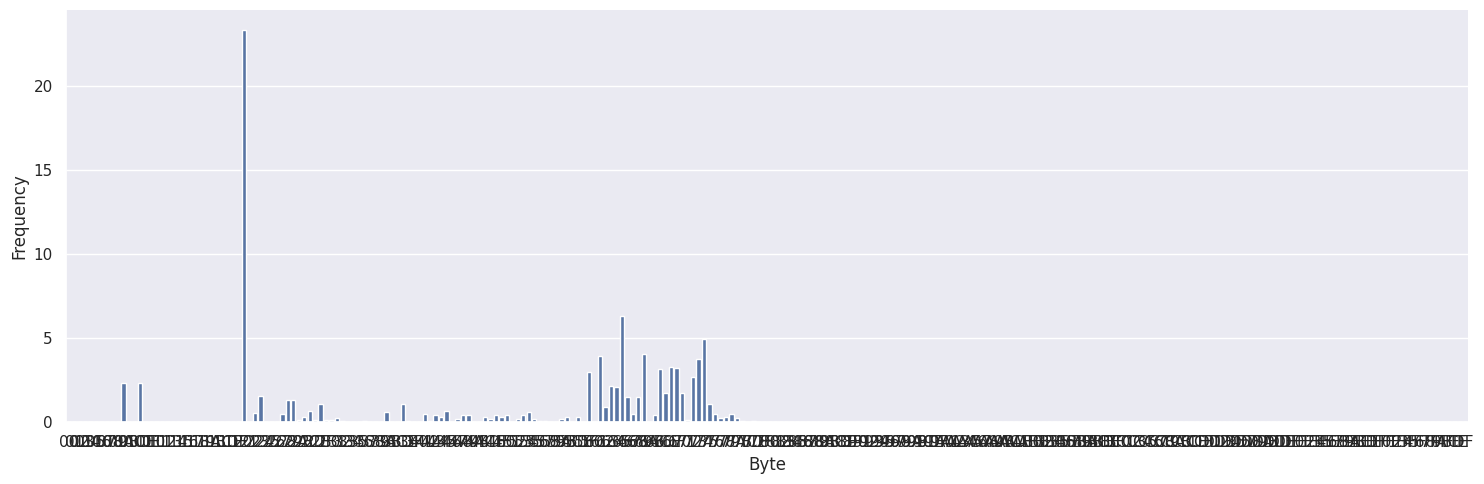

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = pd.DataFrame(list(byte_frequency_table.items()), columns=['Byte', 'Frequency'])
sns.catplot(
        x='Byte',              # x-axis represents byte values (from 00 to FF)
        y='Frequency',         # y-axis represents their corresponding frequency in percentage
        data=df,               # data source is our DataFrame created from the frequency table
        kind='bar',            # type of plot to be created
        aspect=3
    )
plt.show()



NameError: name 'sinplot' is not defined

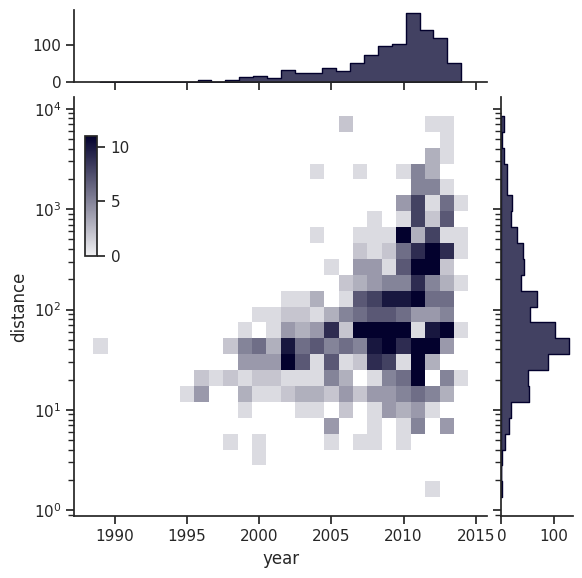

In [19]:

import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
sinplot()

<ipython-input-16-e12393d4d454>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


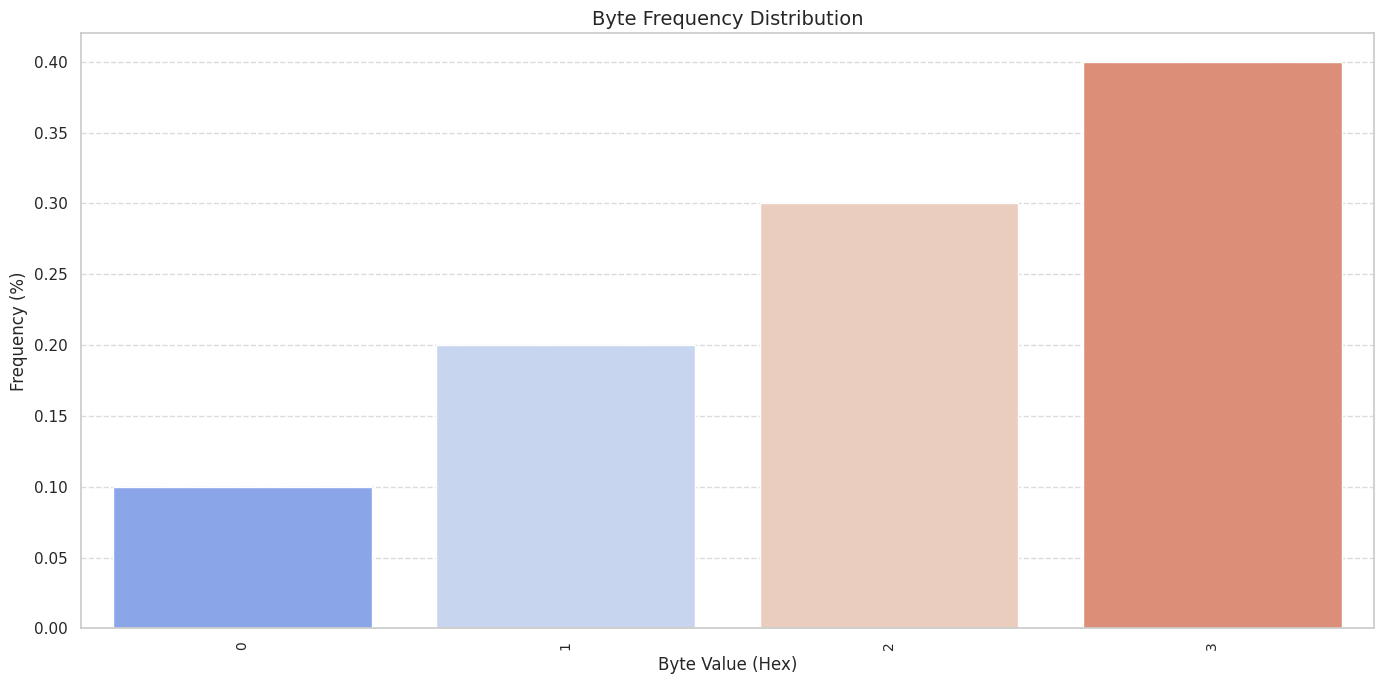

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_byte_frequency_seaborn(frequency_table):
    # Convert frequency_table (dictionary) to a pandas DataFrame
    # This makes it easier to use seaborn for plotting
    df = pd.DataFrame(list(frequency_table.items()), columns=['Byte', 'Frequency'])

    # Set the aesthetic style of the plot for a cleaner look
    sns.set(style="whitegrid")

    # Create a larger figure size for better readability (especially with 256 values)
    plt.figure(figsize=(14, 7))

    # Create a seaborn barplot
    sns.barplot(
        x='Byte',              # x-axis represents byte values (from 00 to FF)
        y='Frequency',         # y-axis represents their corresponding frequency in percentage
        data=df,               # data source is our DataFrame created from the frequency table
        palette='coolwarm'     # a color palette that visually differentiates byte values
    )

    # Annotating the plot: Add labels and title
    plt.xlabel('Byte Value (Hex)', fontsize=12)   # x-axis label with custom font size
    plt.ylabel('Frequency (%)', fontsize=12)      # y-axis label
    plt.title('Byte Frequency Distribution', fontsize=14)  # Title of the plot

    # Rotate x-axis labels by 90 degrees to prevent overlap since there are 256 byte values
    plt.xticks(rotation=90, fontsize=10)          # Rotate and adjust the font size of the labels

    # Adding gridlines to the plot for better readability of frequency levels
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed gridlines along the y-axis

    # Display the plot with a tight layout to ensure no cut-off labels
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_byte_frequency_seaborn({0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4})
# Example Usage (assuming `frequency_table` is available from your function):
# frequency_table = obj.get_byte_frequency_table_by_byte_list(byte_stream)
# plot_byte_frequency_seaborn(frequency_table)